# 1. Problem Statement

* A Retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand   with respect to supply. 
* Over inventory results in losses of material as well as less inventory during High Demand losses oppurtunity to earn good Revenue.
* Therefore , To Address that we will have to get insight from data Provided and communicate with the Management  and Also do the        Prediction and Forecasting of sales for next 12 weeks

 In this Project we will Be doing.
* Exploratory Data Analysis - >To get insights about currect scernarios of Store
* Time Series Model - > Time Series Model to forecast sales for next 12 weeks so that inventory can be managed and help in revenue.


# 2.Importing Dataset and Basic Libraries

In [1]:
#importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
data = pd.read_csv(r'Walmart DataSet.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.shape

(6435, 8)

In [4]:
#creating a copy on data
df=data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


* Converting Date column to Index as a date_time format

In [6]:
#here out Date column is in object format and we need to set it also as Index
df['Date']=pd.to_datetime(df['Date'] ,format='%d-%m-%Y')
df['Date'].dtype

dtype('<M8[ns]')

In [7]:
#setting date columns as index
df.set_index('Date',inplace=True)


In [8]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
#also changing Holiday columns to Categorical
df['Holiday_Flag']=df['Holiday_Flag'].astype('O')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   object 
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 402.2+ KB


CHECKING SOME BASIC CLEANING

In [11]:
#duplicated
df.duplicated().sum()

0

In [12]:
#finding null
df.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
#format is also correct

NOW WE CAN PROCEED WITH THE EXPLORATORY DATA ANALYSIS

# 3. EDA

The key idea of EDA is that the first and most important step in
any project based on data is to look at the data. By summarizing and visualizing the
data, you can gain valuable intuition and understanding of the project.


* Our EDA will focus on two parts : -
    * Numerical Analyis -Descriptive Statistics and Numerical Insights.
    * Visualisation     -Data distribution -Univariate,Bi-variate,Multi-variate

#  3.1 Numerical Analysis

In [22]:
#Descriptive statistics
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()


,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,60.66,3.36,171.58,8.00
std,12.99,564366.62,18.44,0.46,39.36,1.88
min,1.00,209986.25,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,47.46,2.93,131.74,6.89
50%,23.00,960746.04,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,74.94,3.73,212.74,8.62
max,45.00,3818686.45,100.14,4.47,227.23,14.31


In [23]:
#Pearson CORRELATION MATRIX
df.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,1.00,-0.34,-0.02,0.06,-0.21,0.22
Weekly_Sales,-0.34,1.00,-0.06,0.01,-0.07,-0.11
Temperature,-0.02,-0.06,1.00,0.14,0.18,0.10
Fuel_Price,0.06,0.01,0.14,1.00,-0.17,-0.03
CPI,-0.21,-0.07,0.18,-0.17,1.00,-0.30
Unemployment,0.22,-0.11,0.10,-0.03,-0.30,1.00


In [24]:
#checking monotonic relationship among variables
df.corr(method='spearman')

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,1.00,-0.31,-0.03,0.06,-0.24,0.30
Weekly_Sales,-0.31,1.00,-0.07,0.03,-0.06,-0.06
Temperature,-0.03,-0.07,1.00,0.13,0.17,0.04
Fuel_Price,0.06,0.03,0.13,1.00,-0.05,-0.06
CPI,-0.24,-0.06,0.17,-0.05,1.00,-0.39
Unemployment,0.30,-0.06,0.04,-0.06,-0.39,1.00


In [25]:
#chexking number of stores
df.Store.unique()
#45 stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

# Checking for the TOP and WORST performing Stores

In [26]:
df_performance=pd.DataFrame(df.groupby(['Store'],as_index=False)['Weekly_Sales'].mean())
df_performance.sort_values(by='Weekly_Sales',ascending=False)

,Store,Weekly_Sales
19,20,2107676.87
3,4,2094712.96
13,14,2020978.40
12,13,2003620.31
1,2,1925751.34
9,10,1899424.57
26,27,1775216.20
5,6,1564728.19
0,1,1555264.40
38,39,1450668.13


In [27]:
print('Top Performing is Store 20 with mean Weekly sales over the period is ',df_performance['Weekly_Sales'].max(),'\n')
print('Worst Performing is Store 33 with mean Weekly sales over the period is ',df_performance['Weekly_Sales'].min(),'\n')
print('Significant difference between sales of stores is',df_performance['Weekly_Sales'].max()-df_performance['Weekly_Sales'].min())

Top Performing is Store 20 with mean Weekly sales over the period is  2107676.8703496503 

Worst Performing is Store 33 with mean Weekly sales over the period is  259861.69202797202 

Significant difference between sales of stores is 1847815.1783216782


' '

# * EFECT OF WEEKLY SALES BY TEMPERATURE

In [28]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.57,211.10,8.11
2010-02-12,1,1641957.44,1,38.51,2.55,211.24,8.11
2010-02-19,1,1611968.17,0,39.93,2.51,211.29,8.11
2010-02-26,1,1409727.59,0,46.63,2.56,211.32,8.11
2010-03-05,1,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,4.00,192.01,8.68
2012-10-05,45,733455.07,0,64.89,3.98,192.17,8.67
2012-10-12,45,734464.36,0,54.47,4.00,192.33,8.67


In [29]:
#complete correlation of dataset
corr=df['Weekly_Sales'].corr(df['Temperature'])
corr

-0.0638100131794696

In [30]:
#finding correlation of all 45 stores w.r.t Temperature
l=[]
p=[]
for i in range(1,46):
    df_store=df[df.Store==i]
    df_corr_store=df_store['Weekly_Sales'].corr(df_store['Temperature'])
    l.append(df_corr_store)
    p.append(i)
    pd.set_option('display.float_format', '{:.4f}'.format)
    df_corr=pd.DataFrame({'Store':p,'Corr':l})
    
print(l)
print(len(l))

[-0.22270055855381077, -0.29767311082802705, -0.37752429358720924, -0.2255825417409482, -0.17551687386901318, -0.08486307511582623, 0.01507746259919502, -0.3123237415376159, -0.20834332242220086, -0.4325686888435955, -0.27850279002004363, -0.37941565849924175, -0.13774557508715055, -0.1998514916576683, -0.050541340536474626, 0.18294807425152856, 0.0810121664077016, -0.14427783500673316, -0.08080507852114376, -0.2649832854698795, -0.17708437094189414, -0.08289190515894695, 0.05625736322525011, 0.11183321114122231, -0.031311150346977755, 0.21172207626532563, 0.12180917508698373, -0.37650606013576654, -0.12914402773073894, -0.33081629619662123, -0.26219191391866525, -0.11168119456366442, 0.01924414787413381, -0.2785228198088511, 0.04339173108034861, -0.0944535654051107, -0.3004934224173777, 0.03299319368083145, 0.06473759689620633, 0.09059847754779318, 0.10676128742434907, -0.15163896077058045, 0.09527185928907092, 0.267822192302317, -0.20194545108496362]
45


In [31]:
df_corr

,Store,Corr
0,1,-0.2227
1,2,-0.2977
2,3,-0.3775
3,4,-0.2256
4,5,-0.1755
5,6,-0.0849
6,7,0.0151
7,8,-0.3123
8,9,-0.2083
9,10,-0.4326


In [32]:
#from below code we can verify correlation for a particular store
'''df_s=df[df.Store==31]
c=df_s['Weekly_Sales'].corr(df_s['Temperature'])
c'''

"df_s=df[df.Store==31]\nc=df_s['Weekly_Sales'].corr(df_s['Temperature'])\nc"

* Effect of TEMPERATURE FROM POSTIVE TO NEGATIVE IN DESCENDING ORDER

In [33]:
df_corr.sort_values(by='Corr',ascending=False)

,Store,Corr
43,44,0.2678
25,26,0.2117
15,16,0.1829
26,27,0.1218
23,24,0.1118
40,41,0.1068
42,43,0.0953
39,40,0.0906
16,17,0.0810
38,39,0.0647


# Effect of CPI,UNEMPLOYEMENT RATE

In [34]:
li=[]
pi=[]
for i in range(1,46):
    df_store=df[df.Store==i]
    df_corr_store=df_store['Weekly_Sales'].corr(df_store['CPI'])
    li.append(df_corr_store)
    pi.append(i)
    pd.set_option('display.float_format', '{:.4f}'.format)
    df_corr_cpi=pd.DataFrame({'Store':pi,'Corr_cpi':li})
print(li)
len(li)

[0.2254076594290444, -0.06243107067007714, 0.31724963399858214, 0.35115723812788213, 0.3082612991681616, -0.0113574846395366, 0.28904437749320994, 0.1202552303609908, 0.2948054830029043, -0.1153741724021544, 0.06978058146346157, 0.08408667242574058, 0.16397584057555667, -0.41975479220453016, -0.1744674766843987, 0.12428457759372662, 0.3485711731503007, -0.19354111699294185, -0.15534107232709543, 0.05870588224585229, -0.16364877012627854, -0.03860228673099103, 0.0842479894010448, -0.013684306211754337, -0.01091433064843309, 0.13197951444431208, -0.21308232046967787, -0.09590808342001095, -0.07253033622918136, -0.29818804760655643, 0.13288658242840073, 0.19678204967738572, -0.05227128201719589, 0.1154373098011894, -0.4241071564963808, -0.9150952776725552, 0.24450653322669375, 0.8128368242188552, 0.42804310982667837, 0.11331786747501021, 0.39229293576731084, 0.360858946075142, -0.28568626698243316, 0.7401498169960987, -0.02354762041858093]


45

In [35]:
df_corr_cpi

,Store,Corr_cpi
0,1,0.2254
1,2,-0.0624
2,3,0.3172
3,4,0.3512
4,5,0.3083
5,6,-0.0114
6,7,0.2890
7,8,0.1203
8,9,0.2948
9,10,-0.1154


In [36]:
#check manually
#df2=df[df.Store==33]
#df2['Weekly_Sales'].corr(df2['CPI'])

In [37]:
#from most positive to negative effect of CPI on Stores
df_corr_cpi.sort_values(by=['Corr_cpi'],ascending=False)

,Store,Corr_cpi
37,38,0.8128
43,44,0.7401
38,39,0.4280
40,41,0.3923
41,42,0.3609
3,4,0.3512
16,17,0.3486
2,3,0.3172
4,5,0.3083
8,9,0.2948


# EFFECT OF WEEKLY SALES BY UNEMPLOYEMENT

In [38]:
la=[]
pa=[]
for i in range(1,46):
    df_store=df[df.Store==i]
    df_corr_store=df_store['Weekly_Sales'].corr(df_store['Unemployment'])
    la.append(df_corr_store)
    pa.append(i)
    pd.set_option('display.float_format', '{:.4f}'.format)
    df_corr_emp=pd.DataFrame({'Store':pa,'Corr_emp':la})
print(la)
len(la)

[-0.0979553947295795, 0.06632485967770846, -0.2304130134863526, -0.3370151956445587, -0.20704271031605842, 0.044250821015624046, -0.16538168270129636, -0.05257964619712677, -0.1915343637022839, 0.13190762207746096, -0.020338971133082306, -0.009286099902746538, -0.1716328688963503, 0.2107864829459358, 0.0789053686051426, -0.07086358405192238, -0.26359968183073906, 0.13917900226669452, 0.10146392090273439, -0.09534134450284637, 0.21836733305703376, 0.039042867355347455, -0.07716899559088829, -0.012260801238922888, -0.004957651760361549, -0.06689910263473302, -0.0142750519412613, 0.1366706817794531, 0.08468168200648409, 0.20186223641523895, -0.06473780907548937, -0.09945467124759011, 0.10117473193757327, 0.01701025065278913, 0.4838654198192479, 0.8337336178415085, -0.22128669565468617, -0.7852902748572028, -0.38468135708616064, -0.11252795058812329, -0.3506296095634573, -0.3563546441574805, -0.20195435737205705, -0.7800764432910237, -0.004041028359856243]


45

In [39]:
df_corr_emp

,Store,Corr_emp
0,1,-0.0980
1,2,0.0663
2,3,-0.2304
3,4,-0.3370
4,5,-0.2070
5,6,0.0443
6,7,-0.1654
7,8,-0.0526
8,9,-0.1915
9,10,0.1319


In [40]:
df_corr_emp.sort_values(by='Corr_emp',ascending=True)

,Store,Corr_emp
37,38,-0.7853
43,44,-0.7801
38,39,-0.3847
41,42,-0.3564
40,41,-0.3506
3,4,-0.3370
16,17,-0.2636
2,3,-0.2304
36,37,-0.2213
4,5,-0.2070


FROM HERE WE NOTED THAT
 * 20 TOP STORES IN DATAFRAME ARE AFFECTED BY UNEMPLOYEMENT
 * AND BOTTOM 25 STORES SALES WILL INCREASE AS UNEMPLOYMEMENT INCREASE 

# Checking relation between holiday and weekly sales`

In [41]:
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [42]:
df.groupby(['Holiday_Flag'],as_index=False)['Weekly_Sales'].mean()

,Holiday_Flag,Weekly_Sales
0,0,1041256.3802
1,1,1122887.8924


Clearly It shows that Sales on Holidays are higher

In [43]:
df_h=pd.DataFrame(df.groupby(['Holiday_Flag','Store'],as_index=False)['Weekly_Sales'].mean())
df_h[df_h.Holiday_Flag==1].sort_values(by=['Weekly_Sales'],ascending=False)

,Holiday_Flag,Store,Weekly_Sales
64,1,20,2249035.0810
48,1,4,2243102.6240
58,1,14,2120582.9980
54,1,10,2113755.9490
57,1,13,2113043.8060
46,1,2,2079266.9000
71,1,27,1892299.2780
50,1,6,1680907.9270
45,1,1,1665747.6560
63,1,19,1577046.7340


Above is the Descending order list of Stores performing during Holiday

In [44]:
df_h[df_h.Holiday_Flag==0].sort_values(by=['Weekly_Sales'],ascending=False)

,Holiday_Flag,Store,Weekly_Sales
19,0,20,2097048.4335
3,0,4,2083555.8432
13,0,14,2013489.3335
12,0,13,1995392.9755
1,0,2,1914208.8119
9,0,10,1883309.4316
26,0,27,1766412.9632
5,0,6,1555992.8674
0,0,1,1546957.3856
38,0,39,1443114.7945


Above is the Descending order list of Stores performing during non Holiday

# 3.2  Visualization or Data Distribution

In [45]:
from pylab import rcParams
rcParams['figure.figsize']=(11,6)

* FOLLOWING VISUALIZATIONS ARE BASED ON ABOVE NUMERICAL ANALYSIS

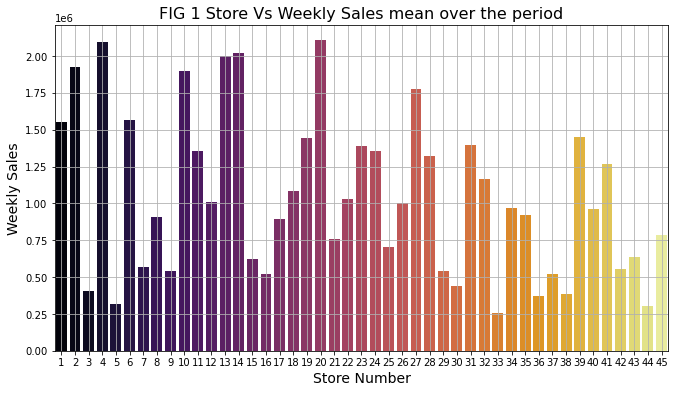

In [46]:
sns.barplot(data=df_performance,y='Weekly_Sales',x='Store',palette='inferno')
plt.title('FIG 1 Store Vs Weekly Sales mean over the period',fontsize=16)
plt.xlabel('Store Number',fontsize=14)
plt.ylabel('Weekly Sales',fontsize=14)
plt.grid();

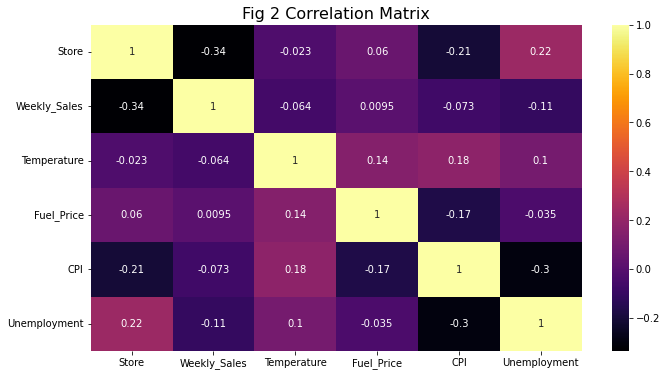

In [47]:
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.title('Fig 2 Correlation Matrix',fontsize=16);

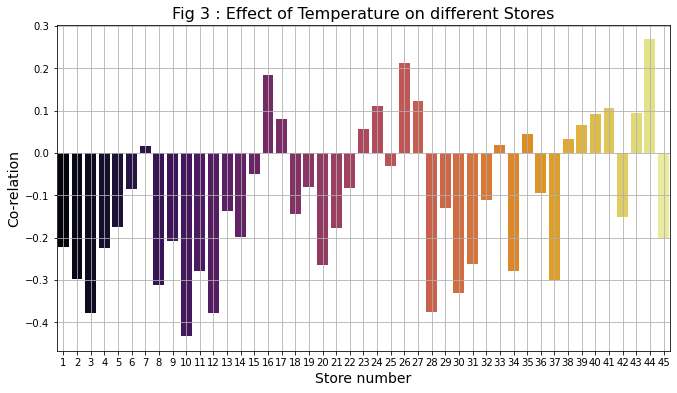

In [48]:
sns.barplot(data=df_corr,y='Corr',x='Store',palette='inferno')
plt.title('Fig 3 : Effect of Temperature on different Stores',fontsize=16)
plt.xlabel('Store number',fontsize=14)
plt.ylabel('Co-relation',fontsize=14)
plt.grid();

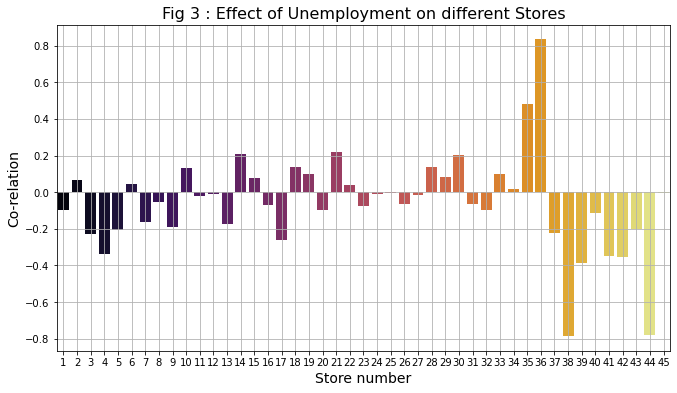

In [49]:
sns.barplot(data=df_corr_emp,y='Corr_emp',x='Store',palette='inferno')
plt.title('Fig 3 : Effect of Unemployment on different Stores',fontsize=16)
plt.xlabel('Store number',fontsize=14)
plt.ylabel('Co-relation',fontsize=14)
plt.grid();

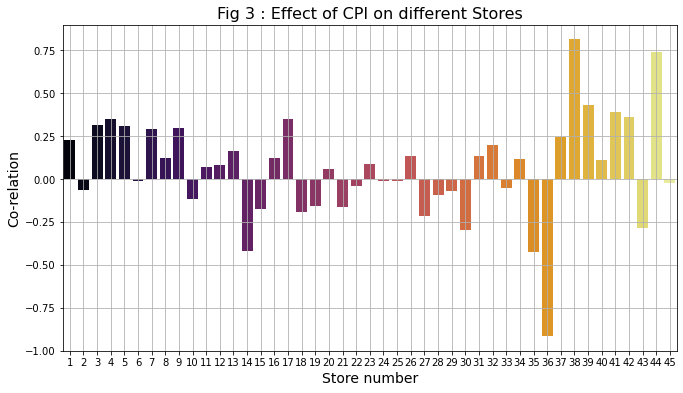

In [50]:
sns.barplot(data=df_corr_cpi,y='Corr_cpi',x='Store',palette='inferno')
plt.title('Fig 3 : Effect of CPI on different Stores',fontsize=16)
plt.xlabel('Store number',fontsize=14)
plt.ylabel('Co-relation',fontsize=14)
plt.grid();

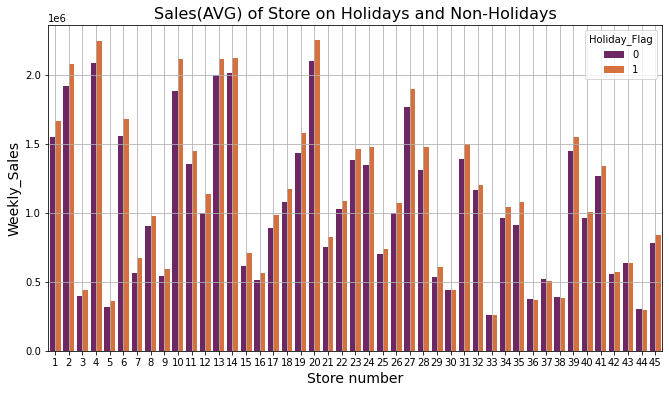

In [51]:
sns.barplot(data=df_h,y='Weekly_Sales',x='Store',palette='inferno',hue='Holiday_Flag')
plt.title('Sales(AVG) of Store on Holidays and Non-Holidays',fontsize=16)
plt.xlabel('Store number',fontsize=14)
plt.ylabel('Weekly_Sales',fontsize=14)
plt.grid();

* UNI-VARIATE VISUALISATION

In [52]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.9000,0,42.3100,2.5720,211.0964,8.1060
2010-02-12,1,1641957.4400,1,38.5100,2.5480,211.2422,8.1060
2010-02-19,1,1611968.1700,0,39.9300,2.5140,211.2891,8.1060
2010-02-26,1,1409727.5900,0,46.6300,2.5610,211.3196,8.1060
2010-03-05,1,1554806.6800,0,46.5000,2.6250,211.3501,8.1060


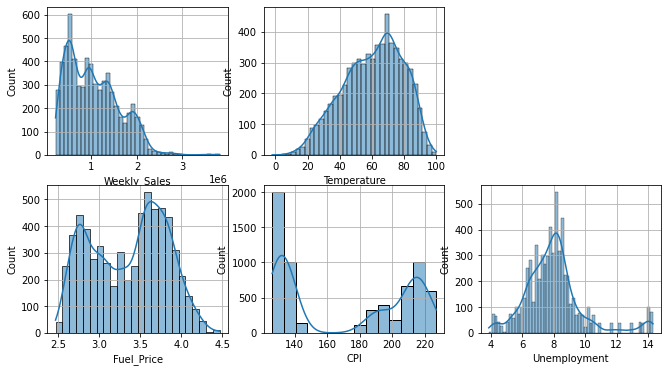

In [53]:


plt.subplot(231)
sns.histplot(df['Weekly_Sales'],palette='inferno',kde=True)
plt.grid()


plt.subplot(232)
sns.histplot(df['Temperature'],palette='inferno',kde=True)
plt.grid()



plt.subplot(234)
sns.histplot(df['Fuel_Price'],palette='inferno',kde=True)
plt.grid()




plt.subplot(235)
sns.histplot(df['CPI'],palette='inferno',kde=True)
plt.grid()



plt.subplot(236)
sns.histplot(df['Unemployment'],palette='inferno',kde=True)
plt.grid()




In [54]:
rcParams['figure.figsize']=(15,8)

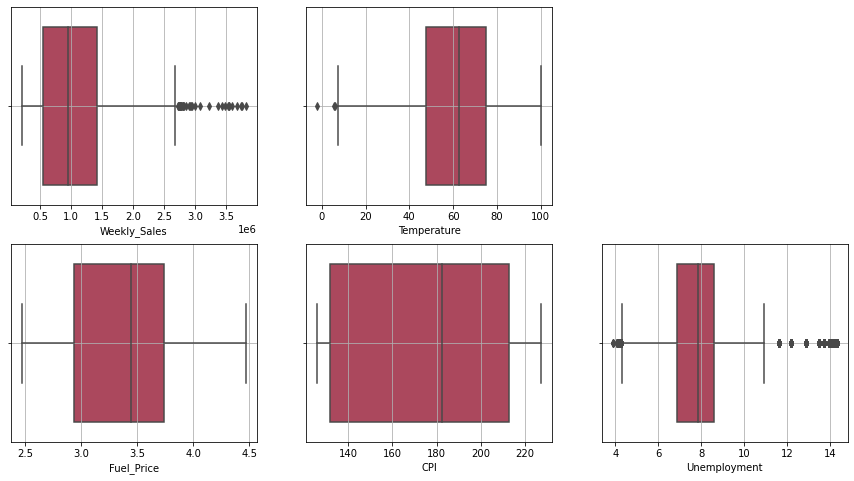

In [55]:


plt.subplot(231)
sns.boxplot(df['Weekly_Sales'],palette='inferno')
plt.grid()


plt.subplot(232)
sns.boxplot(df['Temperature'],palette='inferno')
plt.grid()



plt.subplot(234)
sns.boxplot(df['Fuel_Price'],palette='inferno')
plt.grid()




plt.subplot(235)
sns.boxplot(df['CPI'],palette='inferno')
plt.grid()



plt.subplot(236)
sns.boxplot(df['Unemployment'],palette='inferno')
plt.grid()




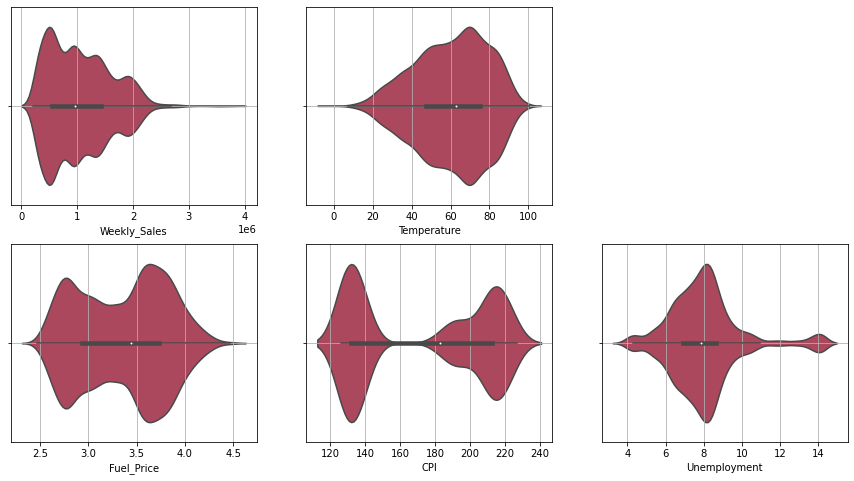

In [56]:


plt.subplot(231)
sns.violinplot(df['Weekly_Sales'],palette='inferno')
plt.grid()


plt.subplot(232)
sns.violinplot(df['Temperature'],palette='inferno')
plt.grid()



plt.subplot(234)
sns.violinplot(df['Fuel_Price'],palette='inferno')
plt.grid()




plt.subplot(235)
sns.violinplot(df['CPI'],palette='inferno')
plt.grid()



plt.subplot(236)
sns.violinplot(df['Unemployment'],palette='inferno')
plt.grid()




* OBSERVATIONS 
    * From the above HIST pLot we can note the distribution of data.
    * From the Box plot we can note statisitcs AND OUTLIER of data 
    * Violin Plot gives combination of Both by providing Distribution and Statistical summary of data

* These distribution will help usin regression modelling.

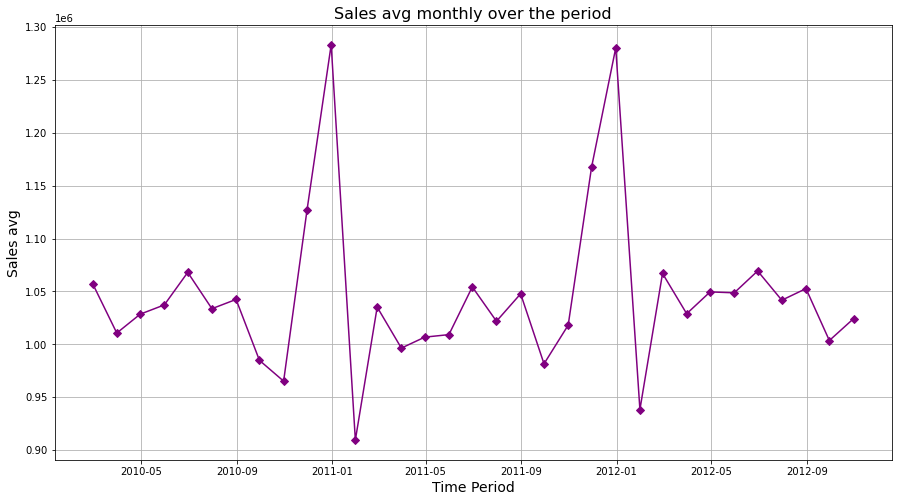

In [57]:

plt.plot(df['Weekly_Sales'].resample('M').mean(),color='Purple',marker='D')
plt.title('Sales avg monthly over the period',fontsize=16)
plt.ylabel('Sales avg',fontsize=14)
plt.xlabel('Time Period',fontsize=14)
plt.grid();


* BI-VARIATE VIZ

In [58]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

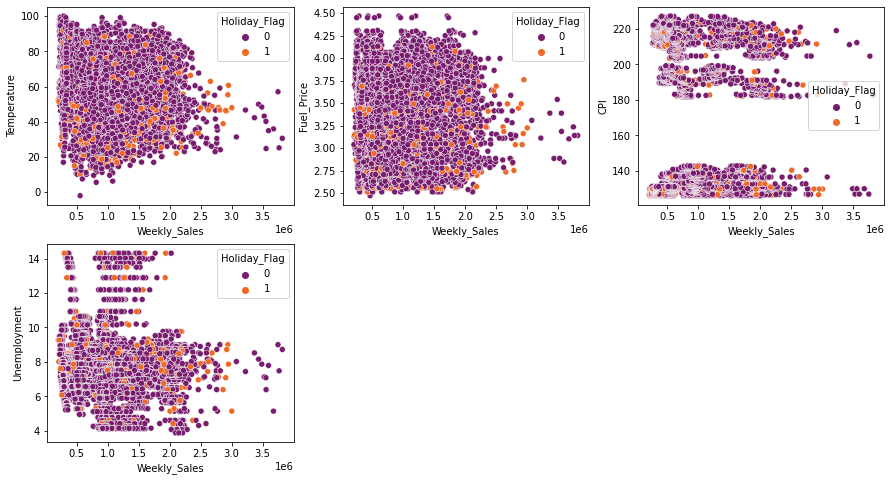

In [59]:


plt.subplot(231)
sns.scatterplot(data=df,x='Weekly_Sales',y='Temperature',palette='inferno',hue='Holiday_Flag')


plt.subplot(232)
sns.scatterplot(data=df,x='Weekly_Sales',y='Fuel_Price',palette='inferno',hue='Holiday_Flag')

plt.subplot(233)
sns.scatterplot(data=df,x='Weekly_Sales',y='CPI',palette='inferno',hue='Holiday_Flag')

plt.subplot(234)
sns.scatterplot(data=df,x='Weekly_Sales',y='Unemployment',palette='inferno',hue='Holiday_Flag');




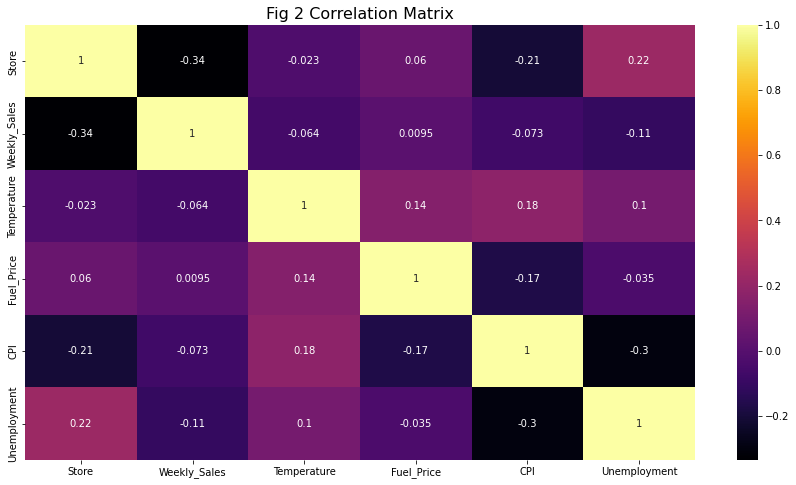

In [60]:
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.title('Fig 2 Correlation Matrix',fontsize=16);

ABOVE TWO BI-VARIATE ANALYSIS EXPLAIN VERY LOW RELATIONSHIO/CORELATION AMONG VARIABLES

# 4. Time Series Modelling

# Approach

* NOW, This data set contains Time series Data of 45 Stores for a same duration '05-02-2010' till '26-10-2012' (eurpoean format)

* This can be check through the below code in comments.


* This clearly shows that it is not a continuous time series data or a continumm. only 143 rows with 45 stores makes total rows 6435 . With 7 columns

* So our Approach is to create an integer input for a particular Store, retrieve the dataset over it and then perform analysis and Modelling


In [61]:
from pylab import rcParams
rcParams['figure.figsize']=7,5

In [63]:
#df[df.Store==21]a

In [64]:
def Store_number(num):
    if 1<=num<=45:
        store_df=df[df.Store==num]
    else:
        print('Enter correct store number beween 1 to 45')
    return store_df

In [65]:
store_df=Store_number(6)



In [66]:

#store_df

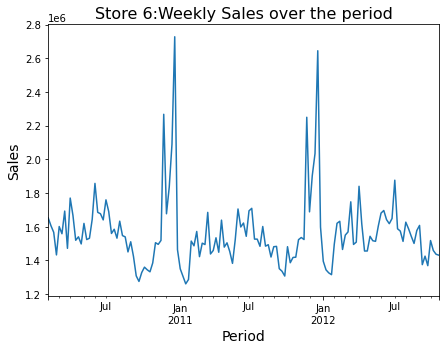

In [67]:
store_df['Weekly_Sales'].plot()
plt.title('Store 6:Weekly Sales over the period',fontsize=16)
plt.xlabel('Period',fontsize=14)
plt.ylabel('Sales',fontsize=14);

# Components of a Time Series

* Trend
* Seasonality
* Cyclicity
* Noise

In [68]:
#GETTING TREND and Cyclicty from Hodrick - Prescott Filter
from statsmodels.tsa.filters.hp_filter import hpfilter

* HODRICK PRESCOTT FILTER
    * The Hodrick–Prescott filter or Hodrick–Prescott decomposition is a mathematical tool that is used in time series analysis and modelling. 
    ** Filter is mainly useful in removing the cyclic component from time-series data.

In [69]:
cycle , trend = hpfilter(store_df['Weekly_Sales'])
trend

Date
2010-02-05   1588302.3508
2010-02-12   1589882.4918
2010-02-19   1591502.8408
2010-02-26   1593213.8565
2010-03-05   1595050.7699
                 ...     
2012-09-28   1482752.2834
2012-10-05   1471050.7131
2012-10-12   1459327.4995
2012-10-19   1447592.0590
2012-10-26   1435853.8512
Name: Weekly_Sales_trend, Length: 143, dtype: float64

In [70]:
cycle

Date
2010-02-05     64332.7492
2010-02-12     16401.3682
2010-02-19    -24364.7708
2010-02-26   -160260.6465
2010-03-05      6298.0501
                 ...     
2012-09-28   -113620.8234
2012-10-05     47126.9969
2012-10-12        69.3405
2012-10-19    -10708.0690
2012-10-26     -4427.5112
Name: Weekly_Sales_cycle, Length: 143, dtype: float64

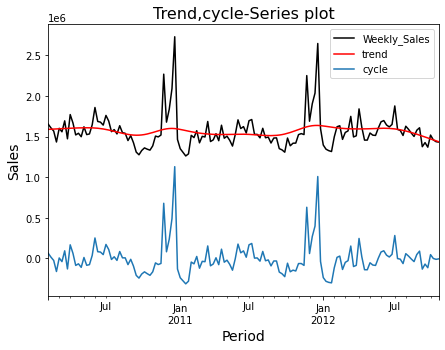

In [71]:
store_df.Weekly_Sales.plot(color='Black')
trend.plot(color='Red',label='trend')
cycle.plot(label='cycle')
plt.title('Trend,cycle-Series plot',fontsize=16)
plt.xlabel('Period',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.legend();

# ETS Decompostion

* The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS).    We've already seen a simplistic example of this in the Introduction to Statsmodels section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.

* * CAPTURES TREND , SEASONALITY AND NOISE FROM SERIES
    * General Behavious of Time series data
    
       ** ALSO THROUGH THIS WE CAN IDENTIFY TO BUILD ADDITIVE OR MULTIPLICATIVE MODEL 

In [72]:
rcParams['figure.figsize']=12,7

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

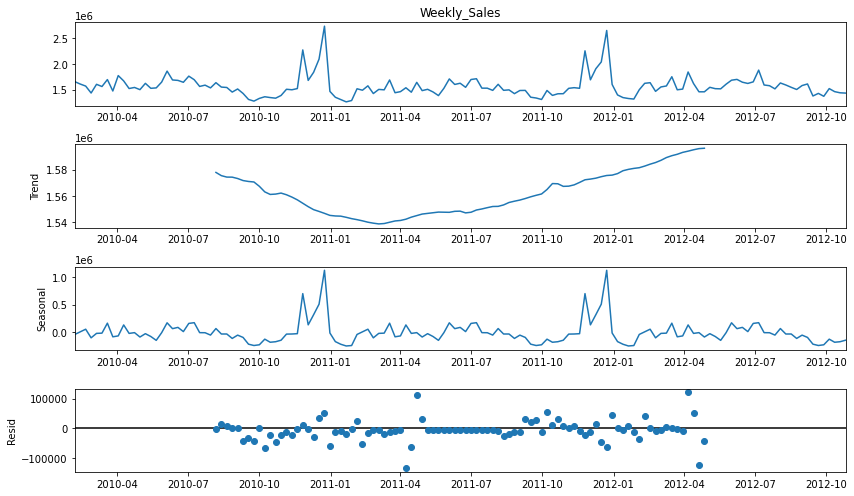

In [74]:
result=seasonal_decompose(store_df['Weekly_Sales'])
result.plot();

# 4.1 BASIC Models

In [75]:
store_df.shape

(143, 7)

In [76]:
#splitting for test train
#Since we have to forecast for next 12 weeks . we will take test data to 12 weeks
train = store_df[:131]
test=store_df[131:]


In [77]:
train.shape

(131, 7)

In [78]:
test.shape

(12, 7)

# simple moving average

In [79]:
from pylab import rcParams
rcParams['figure.figsize']=7,5

<AxesSubplot:xlabel='Date'>

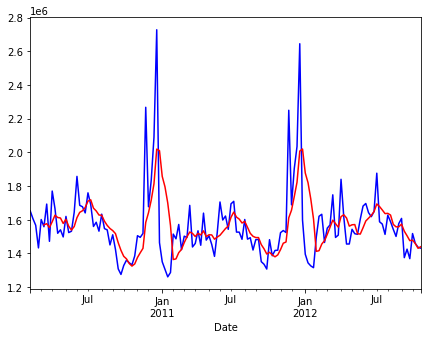

In [80]:
store_df['Weekly_Sales'].plot(color='Blue')
store_df['Weekly_Sales'].rolling(window=6).mean().plot(color='Red')



# EWMA/Simple Expo smoothening,HOLT'S and WINTER'S

<AxesSubplot:xlabel='Date'>

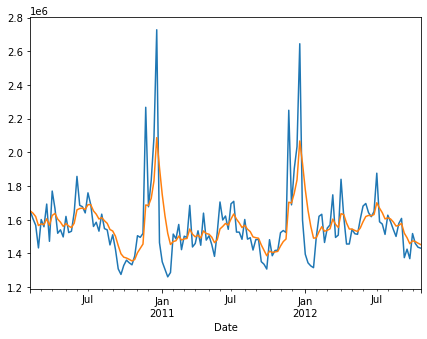

In [81]:
store_df['Weekly_Sales'].plot()
store_df['Weekly_Sales'].ewm(span=6,adjust=False).mean().plot()

# Simple Exponential Smoothening


A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [82]:
span=6
alpha=2/(span+1)

In [83]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Weekly_Sales']).fit(smoothing_level=alpha,optimized=False)


C:\Users\esvit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [84]:
train['SES']=model.fittedvalues.shift(-1)
train['SES']


Date
2010-02-05   1652635.1000
2010-02-12   1639391.8886
2010-02-19   1618747.9404
2010-02-26   1565663.7317
2010-03-05   1575859.4712
                 ...     
2012-07-06   1701008.8439
2012-07-13   1668761.2485
2012-07-20   1641790.0261
2012-07-27   1605058.3500
2012-08-03            NaN
Name: SES, Length: 131, dtype: float64

In [85]:
predicted=model.predict(start=131,end=142)


In [86]:
predicted

2012-08-10   1611405.9443
2012-08-17   1611405.9443
2012-08-24   1611405.9443
2012-08-31   1611405.9443
2012-09-07   1611405.9443
2012-09-14   1611405.9443
2012-09-21   1611405.9443
2012-09-28   1611405.9443
2012-10-05   1611405.9443
2012-10-12   1611405.9443
2012-10-19   1611405.9443
2012-10-26   1611405.9443
Freq: W-FRI, dtype: float64

In [87]:
test['Weekly_Sales']

Date
2012-08-10   1588380.7300
2012-08-17   1543049.5200
2012-08-24   1501095.4900
2012-08-31   1577439.8100
2012-09-07   1608077.0100
2012-09-14   1375166.8600
2012-09-21   1425603.6500
2012-09-28   1369131.4600
2012-10-05   1518177.7100
2012-10-12   1459396.8400
2012-10-19   1436883.9900
2012-10-26   1431426.3400
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Date'>

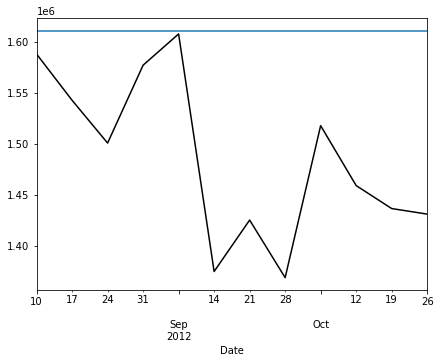

In [88]:
predicted.plot()
test['Weekly_Sales'].plot(color='Black')

# Double Exponenetial Smoothening

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [90]:
model = ExponentialSmoothing(train['Weekly_Sales'],trend='mul').fit()#this trend is noted from ETS
#train['DES']=model.fittedvalues.shift(-1)


C:\Users\esvit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\esvit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [91]:
predicted=model.predict(start=131,end=143)
predicted

2012-08-10   1615779.8891
2012-08-17   1625431.4124
2012-08-24   1635140.5871
2012-08-31   1644907.7574
2012-09-07   1654733.2700
2012-09-14   1664617.4731
2012-09-21   1674560.7175
2012-09-28   1684563.3558
2012-10-05   1694625.7427
2012-10-12   1704748.2352
2012-10-19   1714931.1923
2012-10-26   1725174.9752
2012-11-02   1735479.9471
Freq: W-FRI, dtype: float64

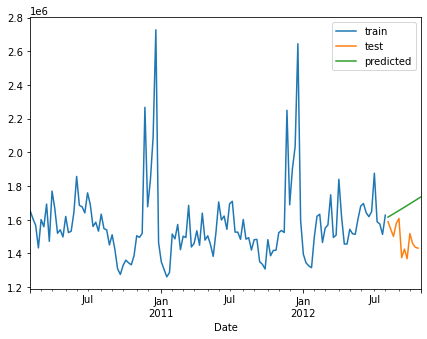

In [92]:
train['Weekly_Sales'].plot(label='train')
test['Weekly_Sales'].plot(label='test')
predicted.plot(label='predicted')
plt.legend()

# Triple Exponentail smoothening

In [93]:
model = ExponentialSmoothing(train['Weekly_Sales'],trend='add',seasonal='add',seasonal_periods=12).fit()
#train['TES']=model.fittedvalues.shift(-1)

C:\Users\esvit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\esvit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [94]:
#train[['Weekly_Sales','DES','SES','TES']].plot()

In [95]:
test

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-08-10,6,1588380.7300,0,87.0400,3.4940,223.5700,5.6680
2012-08-17,6,1543049.5200,0,87.5300,3.5710,223.6510,5.6680
2012-08-24,6,1501095.4900,0,79.0300,3.6200,223.7860,5.6680
2012-08-31,6,1577439.8100,0,83.5800,3.6380,223.9210,5.6680
2012-09-07,6,1608077.0100,1,86.3300,3.7300,224.0560,5.6680
2012-09-14,6,1375166.8600,0,76.4100,3.7170,224.2005,5.6680
2012-09-21,6,1425603.6500,0,70.8100,3.7210,224.4017,5.6680
2012-09-28,6,1369131.4600,0,77.8200,3.6660,224.6030,5.6680
2012-10-05,6,1518177.7100,0,70.8400,3.6170,224.8042,5.3290


In [96]:
predicted=model.predict(start=131,end=142)
predicted

2012-08-10   1326674.6320
2012-08-17   1297849.1307
2012-08-24   1308614.2552
2012-08-31   1320938.2755
2012-09-07   1348191.8905
2012-09-14   1434792.0857
2012-09-21   1469784.1032
2012-09-28   1653876.2644
2012-10-05   1439500.8913
2012-10-12   1527518.4286
2012-10-19   1597657.8048
2012-10-26   1724280.2139
Freq: W-FRI, dtype: float64

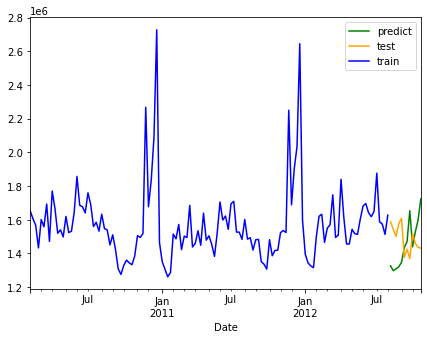

In [97]:
predicted.plot(color='Green',label='predict')
test['Weekly_Sales'].plot(color='Orange',label='test')
train['Weekly_Sales'].plot(color='Blue',label='train')
plt.legend();

In [98]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [99]:
test['Weekly_Sales'].mean()

1486152.4508333337

In [100]:
print('mae',mean_absolute_error(test['Weekly_Sales'],predicted))
print('mse',mean_squared_error(test['Weekly_Sales'],predicted))
print('rmse',np.sqrt(mean_squared_error(test['Weekly_Sales'],predicted)))


mae 183729.24629440784
mse 42335378182.370384
rmse 205755.62734071305


In [101]:
final_model = ExponentialSmoothing(store_df['Weekly_Sales'],trend='add',seasonal='add',seasonal_periods=12).fit()
forecast=final_model.forecast(12)

C:\Users\esvit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\esvit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [102]:
store_df['Weekly_Sales'].tail(2)

Date
2012-10-19   1436883.9900
2012-10-26   1431426.3400
Name: Weekly_Sales, dtype: float64

In [103]:
forecast

2012-11-02   1225138.6528
2012-11-09   1191386.0614
2012-11-16   1190653.2055
2012-11-23   1213757.0986
2012-11-30   1161916.4009
2012-12-07   1219324.1937
2012-12-14   1293410.6661
2012-12-21   1442015.8469
2012-12-28   1303521.8392
2013-01-04   1369404.6472
2013-01-11   1431854.6337
2013-01-18   1574337.4838
Freq: W-FRI, dtype: float64

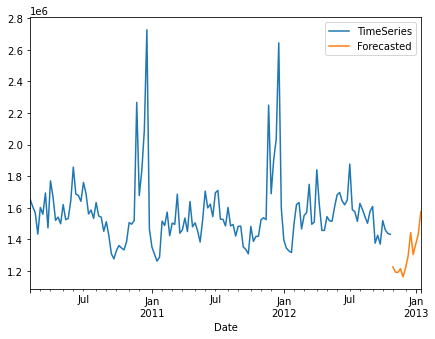

In [104]:
store_df['Weekly_Sales'].plot(label='TimeSeries')
forecast.plot(label='Forecasted')
plt.legend()

* FROM ABOVE 
    * We can note Basic Models are not caputring the data well but work accoriding to their theory 
    * Fort this now we would move to advance Models.

# 4.2 ADVANCED MODELS

# BEFORE MODELLING DO SOME DESCRIPTIVE ANALYSIS

<AxesSubplot:xlabel='Date'>

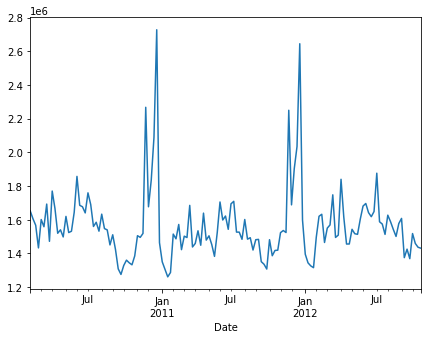

In [105]:
store_df['Weekly_Sales'].plot()

# ACF AND PACF PLOTS

In [106]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

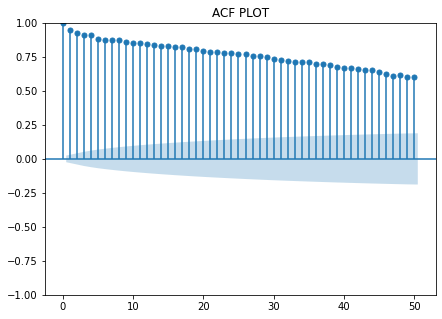

In [107]:
plot_acf(df['Weekly_Sales'],lags=50)
plt.title('ACF PLOT');

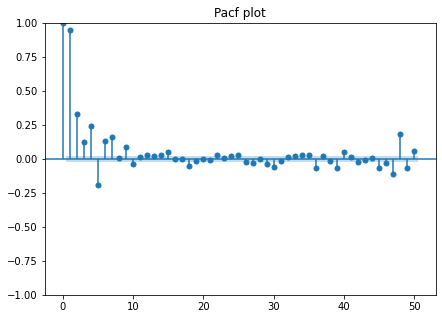

In [108]:
plot_pacf(df['Weekly_Sales'],lags=50)
plt.title('Pacf plot');

# ADFULLER TEST

The ADfuller Test is used to check the stationarity of the data

In [109]:
from statsmodels.tsa.stattools import adfuller

In [110]:
def ad_test(DF):
    ad_t=adfuller(store_df['Weekly_Sales'])
    if ad_t[1] > 0.05:
        print('Data is non stationary with p values as',ad_t[1])
    else:
        print('Data is stationary with p values as ',ad_t[1])

In [111]:
ad_test(store_df['Weekly_Sales'])

Data is stationary with p values as  2.1594858682169855e-06


# Seasonality Graph

In [112]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

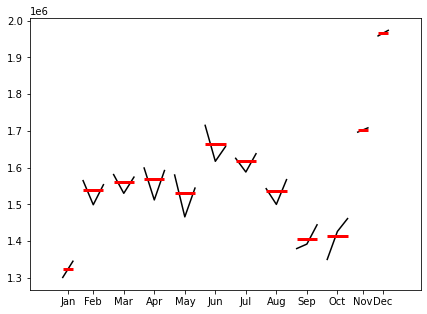

In [113]:
store_df_monthly=store_df['Weekly_Sales'].resample('M').mean()
month_plot(store_df_monthly);

# ARIMA MODEL

CHECKING ORDER OF ARIMA THROUGH pmarima

In [114]:
from pmdarima import auto_arima

In [115]:
step =auto_arima(store_df['Weekly_Sales'],start_p=0,start_q=0,max_p=6,max_q=3,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3917.123, Time=0.61 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3887.129, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3897.124, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4489.694, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3888.171, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3888.510, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3890.197, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3934.853, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.341 seconds


In [116]:
#cobination of models based on different values of p and q =7*4 =28 models
#best model will be out based on AIC and it will stop running since no change in AIC
#seasonal = True since it is a non - stationary data.

In [117]:
print('Order of arima model is',step.order)

Order of arima model is (1, 0, 0)


In [118]:
print(step.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1940.564
Date:                Sat, 13 May 2023   AIC                           3887.129
Time:                        18:02:05   BIC                           3896.017
Sample:                    02-05-2010   HQIC                          3890.740
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.603e+05   7.59e+04     11.333      0.000    7.11e+05    1.01e+06
ar.L1          0.4501      0.040     11.274      0.000       0.372       0.528
sigma2      3.601e+10      0.958   3.76e+10      0.0

MODEL

In [119]:
#to ccheck differencing and then checking stationarity by adfuller after differenicing
#from statsmodels.tsa.statespace.tools import diff
#d=diff(store_df['Weekly_Sales'],k_diff=1)
#adfuller(d)

In [120]:
step.order

(1, 0, 0)

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
from statsmodels.tsa.arima.model import ARIMA

In [123]:
model = ARIMA(train['Weekly_Sales'] , order=step.order).fit()

In [124]:
predicted = model.predict(start=131,end=142,type='level')
predicted

2012-08-10   1596337.7203
2012-08-17   1582692.8108
2012-08-24   1576674.7001
2012-08-31   1574020.4020
2012-09-07   1572849.7192
2012-09-14   1572333.3876
2012-09-21   1572105.6586
2012-09-28   1572005.2184
2012-10-05   1571960.9191
2012-10-12   1571941.3808
2012-10-19   1571932.7634
2012-10-26   1571928.9626
Freq: W-FRI, Name: predicted_mean, dtype: float64

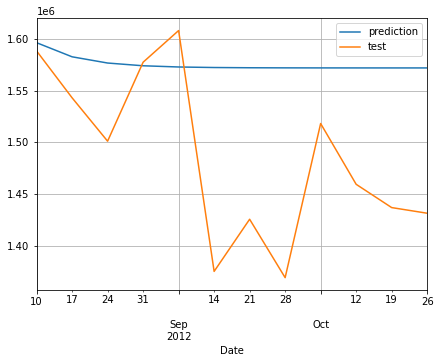

In [125]:
predicted.plot(label='prediction')
test['Weekly_Sales'].plot(label='test')
plt.legend()
plt.grid();

In [126]:
from statsmodels.tools.eval_measures import rmse,mse,meanabs
print('mean_squared_ error',mse(test['Weekly_Sales'],predicted))
print('mean_absolute_error',meanabs(test['Weekly_Sales'],predicted))
print('Root_mean_square_error',rmse(test['Weekly_Sales'],predicted))

mean_squared_ error 13636090078.106325
mean_absolute_error 95853.9692031187
Root_mean_square_error 116773.67031187435


In [127]:
test['Weekly_Sales'].mean()

1486152.4508333337

In [128]:

rmse(test['Weekly_Sales'],predicted)/test['Weekly_Sales'].mean()*100

7.857448961336072

# Forecasting

In [129]:
model = ARIMA(store_df['Weekly_Sales'],order=step.order).fit()


In [130]:
forecast = model.forecast(12)
forecast

2012-11-02   1505154.0644
2012-11-09   1538103.8289
2012-11-16   1552829.4560
2012-11-23   1559410.5075
2012-11-30   1562351.6547
2012-12-07   1563666.0871
2012-12-14   1564253.5220
2012-12-21   1564516.0534
2012-12-28   1564633.3817
2013-01-04   1564685.8170
2013-01-11   1564709.2510
2013-01-18   1564719.7239
Freq: W-FRI, Name: predicted_mean, dtype: float64

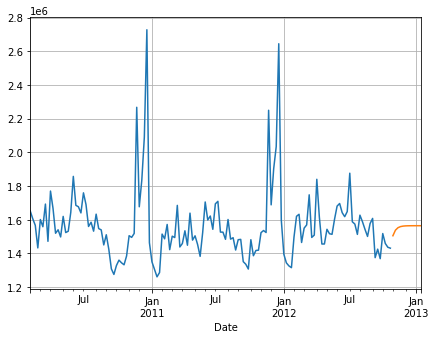

In [131]:
store_df['Weekly_Sales'].plot(label='Series')
forecast.plot(label='Forecasted')
plt.grid();

# SARIMA MODEL

In [132]:
rcParams['figure.figsize']=10,7

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

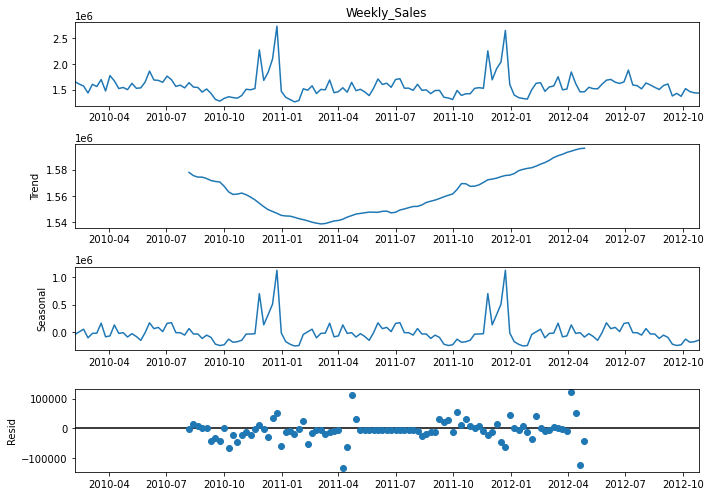

In [134]:
seasonal_decompose(store_df['Weekly_Sales']).plot();

In [135]:
step2 = auto_arima(store_df['Weekly_Sales'] ,seasonal=True,m=12,stationary=False)

In [136]:
print(step2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1940.564
Date:                Sat, 13 May 2023   AIC                           3887.129
Time:                        18:02:31   BIC                           3896.017
Sample:                    02-05-2010   HQIC                          3890.740
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.603e+05   7.59e+04     11.333      0.000    7.11e+05    1.01e+06
ar.L1          0.4501      0.040     11.274      0.000       0.372       0.528
sigma2      3.601e+10      0.958   3.76e+10      0.0

In [137]:
step2.seasonal_order

(0, 0, 0, 12)

In [138]:
model=SARIMAX(train['Weekly_Sales'],order=step2.order,seasonal_order=step2.seasonal_order,initialization='approximate_diffuse',enforce_invertibility=False).fit()

In [139]:
predicted=model.predict(start=131,end=142)
predicted

2012-08-10   1609782.7960
2012-08-17   1592478.6910
2012-08-24   1575360.5937
2012-08-31   1558426.5046
2012-09-07   1541674.4459
2012-09-14   1525102.4608
2012-09-21   1508708.6136
2012-09-28   1492490.9895
2012-10-05   1476447.6941
2012-10-12   1460576.8536
2012-10-19   1444876.6142
2012-10-26   1429345.1420
Freq: W-FRI, Name: predicted_mean, dtype: float64

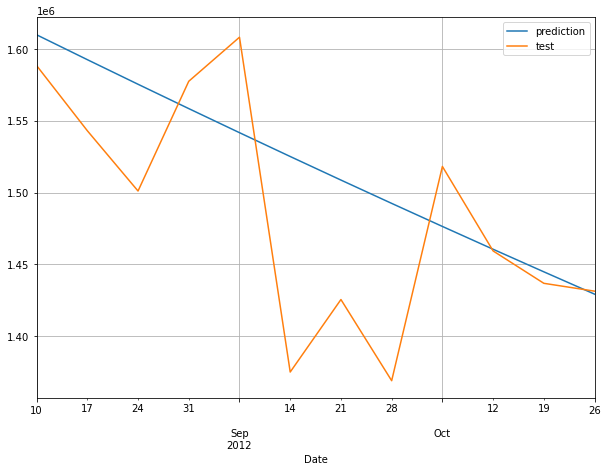

In [140]:
predicted.plot(label='prediction')
test['Weekly_Sales'].plot(label='test')
plt.legend()
plt.grid();

In [141]:
from statsmodels.tools.eval_measures import rmse,mse,meanabs
print('mean_squared_ error',mse(test['Weekly_Sales'],predicted))
print('mean_absolute_error',meanabs(test['Weekly_Sales'],predicted))
print('Root_mean_square_error',rmse(test['Weekly_Sales'],predicted))

mean_squared_ error 4966924687.50422
mean_absolute_error 53324.67963869986
Root_mean_square_error 70476.4122774721


In [142]:
test['Weekly_Sales'].mean()

1486152.4508333337

In [143]:

rmse(test['Weekly_Sales'],predicted)/test['Weekly_Sales'].mean()

0.04742206106644961

# Forecast

In [144]:
model = SARIMAX(store_df['Weekly_Sales'],order=step2.order,seasonal_order=step2.seasonal_order,initialization='approximate_diffuse').fit()

In [145]:
forecast = model.forecast(12)
forecast

2012-11-02   1415811.1792
2012-11-09   1400366.3613
2012-11-16   1385090.0280
2012-11-23   1369980.3413
2012-11-30   1355035.4834
2012-12-07   1340253.6561
2012-12-14   1325633.0810
2012-12-21   1311171.9990
2012-12-28   1296868.6702
2013-01-04   1282721.3738
2013-01-11   1268728.4075
2013-01-18   1254888.0879
Freq: W-FRI, Name: predicted_mean, dtype: float64

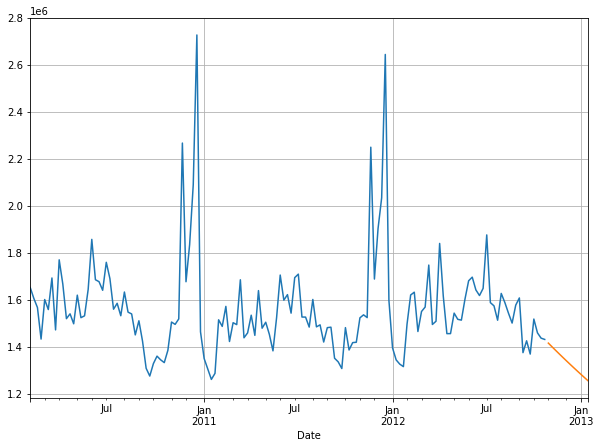

In [146]:
store_df['Weekly_Sales'].plot(label='Series')
forecast.plot(label='Forecasted')
plt.grid();

# CONCLUSION 

Here in this Project We first analys the current Status of the Walmart Stores across the region and Through EDA we checked dependency of weekly sales on other independent factors and Performance of stores,their relation with independent factors.
Then we try to forecast theor sales with Basic model-Simple moving average,Exponential moving avergae , Holt Winter  and then advanced models like ARIMA,SARIMA.
Among all the Model we found that SARIMA predicsts well with least RMSE and can be deployed on server .
Also ,in our project a User can input store number retreive the data and then perform analysis. It could be a possibilty that other than SARIMA other models can forecast better.

Drawbacks of this datasets are very less data for a particular store o which our model hasn’t trained well.if we would have mode data we can trained these models well and also can test them on deep learnig models and FB prophet.

